In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('max_columns', 100)

In [3]:
df_raw = pd.read_csv('data/2019-candidate-campaigns.csv', index_col=0)
df_raw.fillna(0, inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 61
Data columns (total 41 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Candidate                                            62 non-null     object 
 1   Coalition                                            62 non-null     object 
 2   Party                                                62 non-null     object 
 3   Twitter - Number of Mentions                         62 non-null     float64
 4   Twitter - Number of Users                            62 non-null     float64
 5   Twitter- Total Favorites                             62 non-null     float64
 6   Twitter - Total Retweets                             62 non-null     float64
 7   Twitter - Total Replies                              62 non-null     float64
 8   Twitter - Percent News                               62 non-null     flo

In [4]:
candidates = df_raw.iloc[:, 0:3]
contrib = df_raw.loc[:, 'Win': 'Total Contributions Received'].fillna(0)
df = pd.concat([candidates,contrib], axis =1)

In [5]:
candidates = df_raw.iloc[:, 0:3]
contrib = df_raw.loc[:, 'Win': 'Total Contributions Received'].fillna(0)
df = pd.concat([candidates,contrib], axis =1)
df['Total Cash Contributions'] = df['Cash Contributions Received from Other Sources'] + df['Cash Contributions Received from Political Party']
df['Total In-Kind Contributions'] = df['In-Kind Contributions Received from Other Sources'] + df['In-Kind Contributions Received from Political Party']
df

,Candidate,Coalition,Party,Win,Cash Contributions Received from Other Sources,In-Kind Contributions Received from Other Sources,Cash Contributions Received from Political Party,In-Kind Contributions Received from Political Party,Total Contributions Received,Total Cash Contributions,Total In-Kind Contributions
Candidate Number,,,,,,,,,,,
1,Abner Afuang,WPP,WPP,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,Agnes Escudero,KKK,Independent,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,Allan Montaño,Labor Win,Independent,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,Balde Baldevarona,0,Independent,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,Bam Aquino,Otso Diretso,Liberal,0.0000,"126,350,000.0000","300,000.0000",0.0000,0.0000,"126,650,000.0000","126,350,000.0000","300,000.0000"
...,...,...,...,...,...,...,...,...,...,...,...
57,Shariff Albani,WPP,WPP,0.0000,"400,000.0000","104,978.0000",0.0000,0.0000,"504,978.0000","400,000.0000","104,978.0000"
58,Sonny Angara,HNP,LDP,1.0000,0.0000,0.0000,0.0000,"153,341,072.4100","153,341,072.4100",0.0000,"153,341,072.4100"
59,Sonny Matula,"Labor Win, WPP",WPP,0.0000,"102,000.0000","218,441.9100",0.0000,0.0000,"320,441.9100","102,000.0000","218,441.9100"


In [7]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
# Select features for clustering
feature_cols = ['Total Cash Contributions', 'Total In-Kind Contributions']
X = df[feature_cols]

# Feature scaling
X=Normalizer().fit_transform(X.values)

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
sil = []

# changing the number of clusters 
for k in range(2,10):
    
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

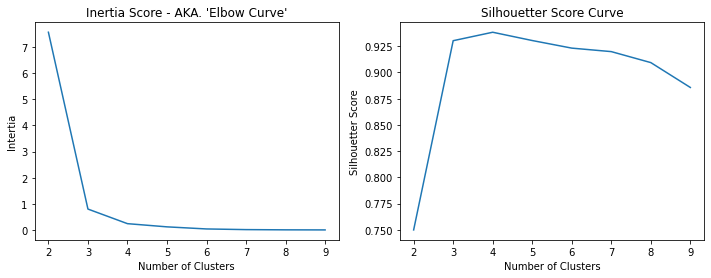

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Plotting Elbow Curve

x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title("Inertia Score - AKA. 'Elbow Curve'")


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
labels = kmeans.predict(X)
df['Cluster Labels'] = labels

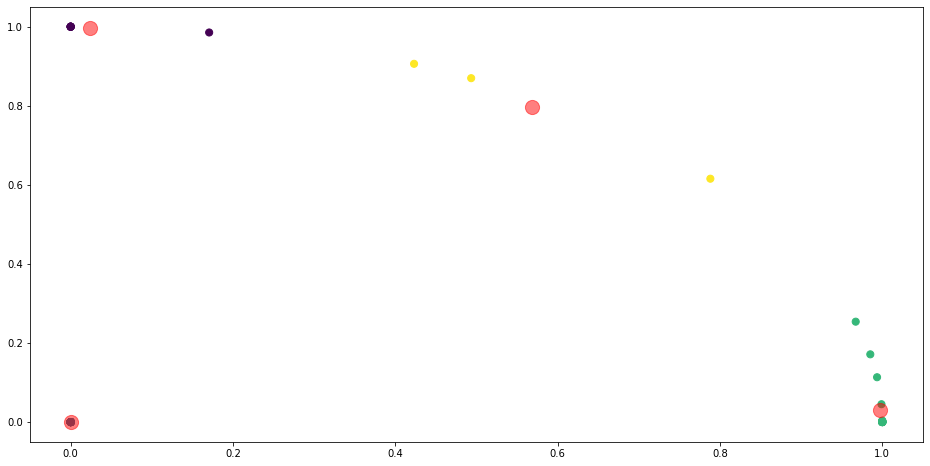

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=.5);

In [ ]:
df[df['Cluster Labels']==0]

In [ ]:
df[df['Cluster Labels']==1]

In [ ]:
df[df['Cluster Labels']==2]

In [ ]:
df[df['Cluster Labels']==3]

# BOX PLOT

In [17]:
win = df.iloc[:, :4]
total_contrib = df.iloc[:, 8:-1]
df1 = pd.concat([win, total_contrib], axis=1)

melted_df1=pd.melt(df1.iloc[:, 3:], id_vars="Win")

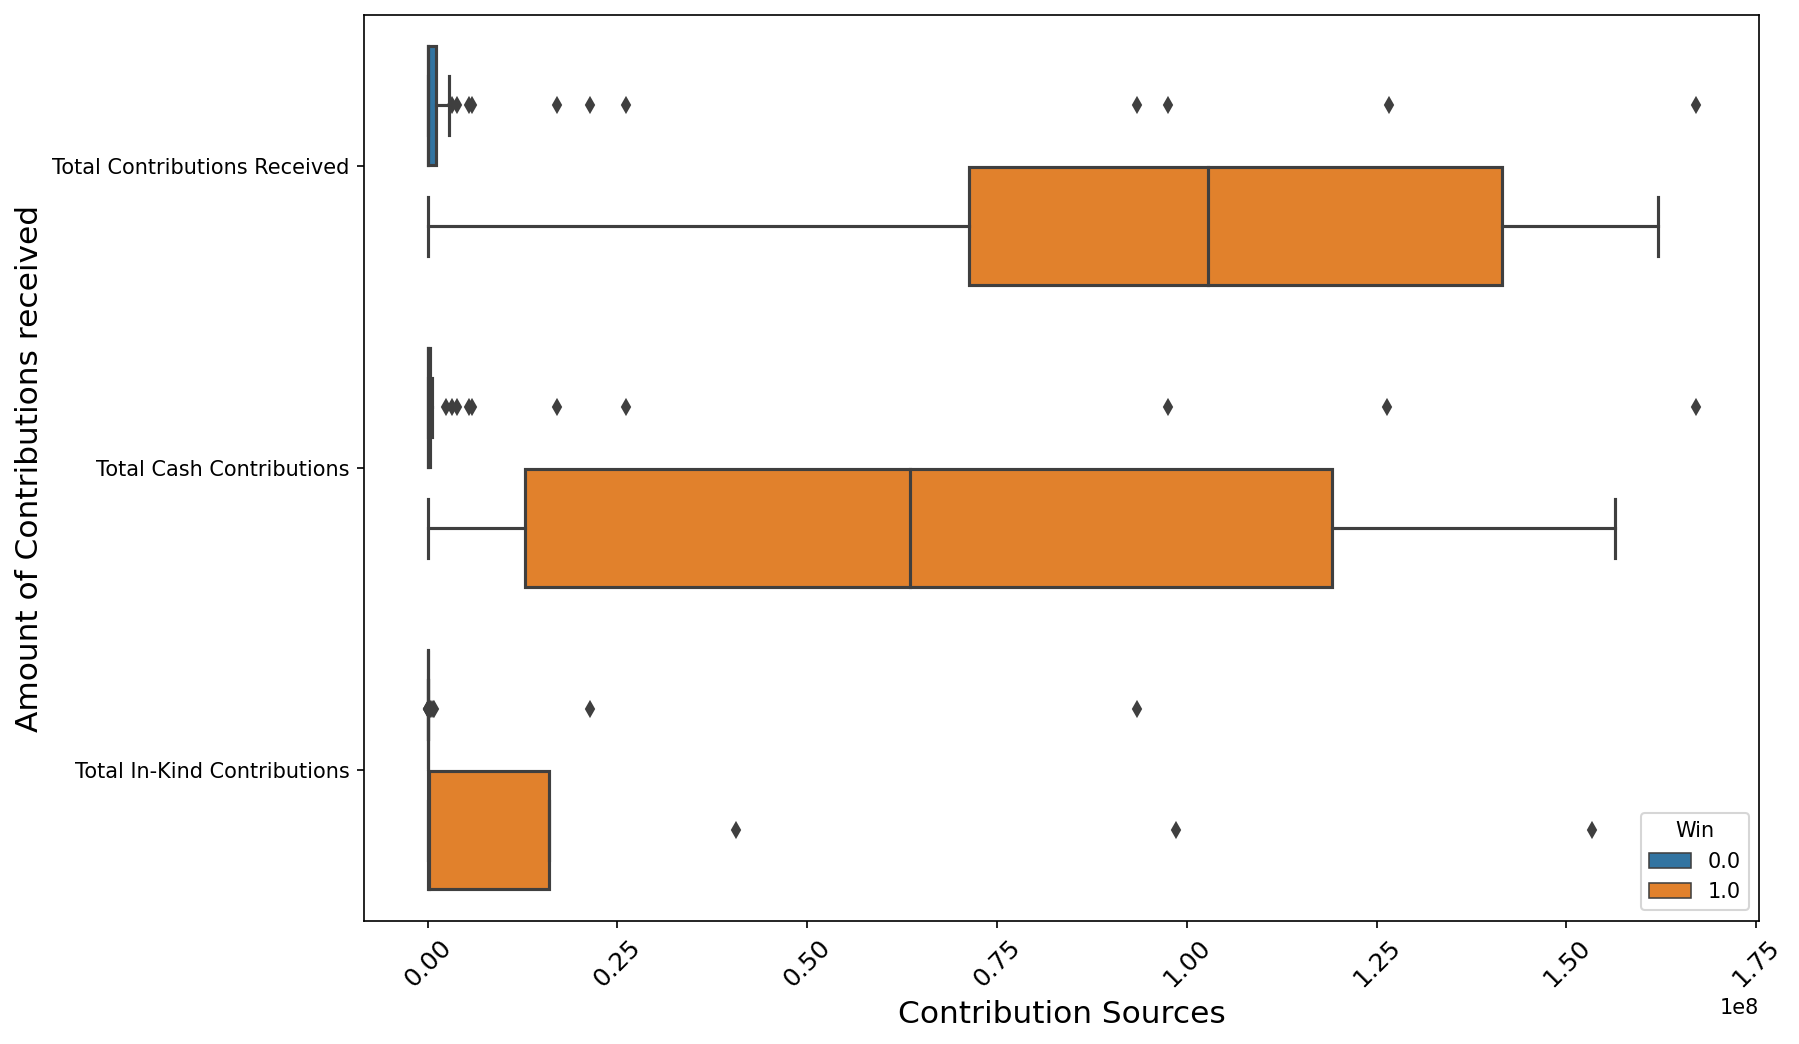

In [18]:
plt.figure(figsize=(12,8), dpi = 150)

sns.boxplot(y = melted_df1['variable'],
            x = melted_df1['value'],
            hue = melted_df1['Win'])

plt.title('', fontsize = 20)
plt.xlabel('Contribution Sources', fontsize=15)
plt.ylabel('Amount of Contributions received', fontsize=15)
plt.xticks(rotation=45, fontsize=12)

plt.show()